In [2]:
import sys
sys.path.insert(0, '../')

In [3]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

%load_ext autoreload

Training...
 [ 6000 / 6000 ] 100% 0.00099 it/s
...ready!


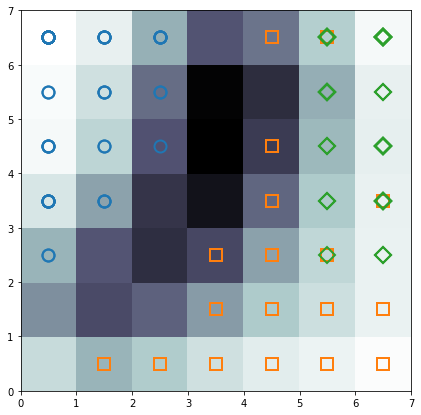

In [32]:
%autoreload 2
data = np.genfromtxt('iris.csv', delimiter=',', usecols=(0, 1, 2, 3))
# data normalization
data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, data)

# Initialization and training
som = MiniSom(7, 7, 4, sigma=2.5, learning_rate=0.5, 
              neighborhood_function='gaussian', random_seed=10)

som.pca_weights_init(data)
print("Training...")
som.train_batch(data, 6000, verbose=True)  # random training
print("\n...ready!")

plt.figure(figsize=(7, 7))
# Plotting the response for each pattern in the iris dataset
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
#plt.colorbar()

target = np.genfromtxt('iris.csv', delimiter=',', usecols=(4), dtype=str)
t = np.zeros(len(target), dtype=int)
t[target == 'setosa'] = 0
t[target == 'versicolor'] = 1
t[target == 'virginica'] = 2

# use different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)
plt.axis([0, 7, 0, 7])
plt.savefig('resulting_images/som_iris.png')
plt.show()

Activations frequencies
----

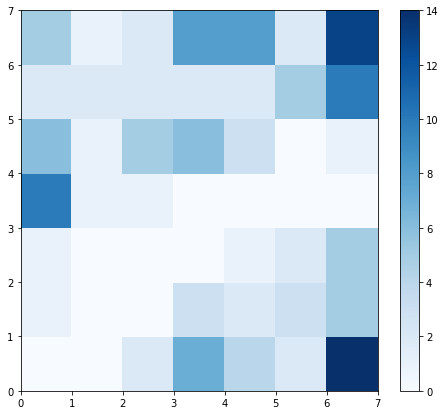

In [47]:
plt.figure(figsize=(8, 7))
frequencies = np.zeros((7, 7))
for position, values in som.win_map(data).items():
    frequencies[position[0], position[1]] = len(values)
plt.pcolor(frequencies, cmap='Blues')
plt.colorbar()
plt.show()

Class pies
----

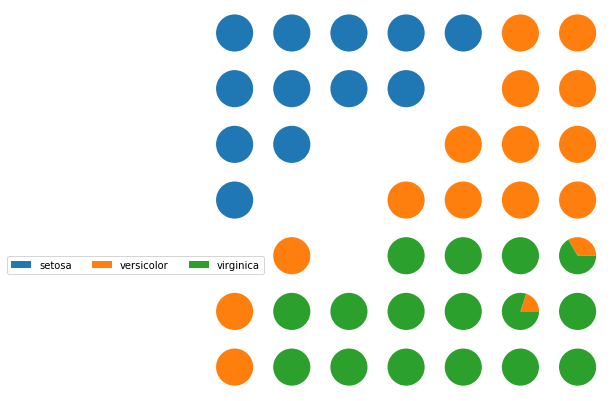

In [15]:
label = np.genfromtxt('iris.csv', delimiter=',', usecols=(4), dtype=str)
labels_map = som.labels_map(data, label)
label_names = np.unique(label)

plt.figure(figsize=(7, 7))
the_grid = GridSpec(7, 7)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[6-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 3), ncol=3)
plt.savefig('resulting_images/som_iris_pies.png')
plt.show()

Quantization error
----

iteration=9999 status=100.00% error=0.01760520364334338

Text(0.5, 0, 'iteration index')

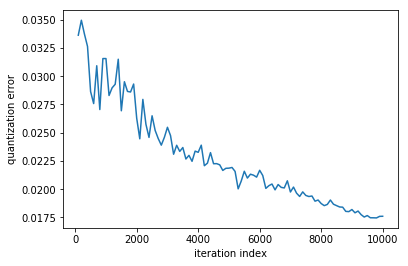

In [6]:
som = MiniSom(7, 7, 4, sigma=1., learning_rate=0.5, 
              neighborhood_function='gaussian', random_seed=10)
som.pca_weights_init(data)
max_iter = 10000
q_error_pca_init = []
iter_x = []
for i in range(max_iter):
    percent = 100*(i+1)/max_iter
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    if (i+1) % 100 == 0:
        error = som.quantization_error(data)
        q_error_pca_init.append(error)
        iter_x.append(i)
        sys.stdout.write(f'\riteration={i:2d} status={percent:0.2f}% error={error}')
        
plt.plot(iter_x, q_error_pca_init)
plt.ylabel('quantization error')
plt.xlabel('iteration index')